### 전처리(Preprocessing)
* 원본 raw 데이터의 품질이 좋지 않아서 가공하여 데이터의 품질을 향상 시키는 과정

(1) 표준화(Standardization) : 데이터가 평균으로 부터 얼마나 떨어져 있는지를 나타내는 값으로, 특정 범위를 벗어난 데이터를 
    이상치(outlier)로 간주하여 제거한다, StandardScaler사용, Z = ( X - mean())/std()

(2) 정규화(Normalization) : 데이터를 범위를 일치시키거나 분포를 유사하게 만들어 주는 기능, 데이터 범위를 0 ~ 1 사이의 값으로 변환
    MinMaxScaler사용,  Z = (X - min())/(max() - min())

#### 데이터 분석 절차
데이터 표준화를 통해 outlier를 제거하고, 그 다음에 데이터 정규화를 하여 상대적 크기의 영향력을 줄인 다음 분석을 시작한다

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 표준화(Standardization)

In [2]:
# (1) Numpy를 이용한 표준화
# Z = ( X - mean())/std()

data = np.random.randint(1000, size=(3,4))  # 0 ~ 999 까지의 정수
print('raw_data:\n',data)

data_stand_np = ( data - np.mean(data,axis = 0))/np.std(data,axis = 0) #  행방향, 수직방향 평균
print('numpy standardized data:\n',data_stand_np)

raw_data:
 [[376 320 922 150]
 [765 117 403 932]
 [694 236 407  99]]
numpy standardized data:
 [[-1.39329348  1.14868022  1.41418182 -0.63916234]
 [ 0.90652758 -1.28876317 -0.71529699  1.41210285]
 [ 0.4867659   0.14008295 -0.69888482 -0.77294051]]


In [3]:
# (2) scipy.stats 를 이용한 표준화 : zscore()
import scipy.stats as ss
data_stand_ss = ss.zscore(data)
# print('raw_data:\n',data)
print('scipy standardized data:\n',data_stand_ss)

scipy standardized data:
 [[-1.39329348  1.14868022  1.41418182 -0.63916234]
 [ 0.90652758 -1.28876317 -0.71529699  1.41210285]
 [ 0.4867659   0.14008295 -0.69888482 -0.77294051]]


In [4]:
# (3) sklearn.preprocessing 를 이용한 표준화
# StandardScaler().fit_transform()
from sklearn.preprocessing import StandardScaler
data_stand_skl = StandardScaler().fit_transform(data)
print('sklearn standardized data:\n',data_stand_skl)

sklearn standardized data:
 [[-1.39329348  1.14868022  1.41418182 -0.63916234]
 [ 0.90652758 -1.28876317 -0.71529699  1.41210285]
 [ 0.4867659   0.14008295 -0.69888482 -0.77294051]]


In [5]:
# 정규화
# (1) Numpy를 이용한 정규화
# Z = (X - min()) / (max() - min())
data_minmax_np = ( data - np.min(data, axis=0))/(np.max(data,axis=0) - np.min(data,axis=0))
print('numpy minmax data:\n',data_minmax_np)

numpy minmax data:
 [[0.         1.         1.         0.06122449]
 [1.         0.         0.         1.        ]
 [0.81748072 0.5862069  0.00770713 0.        ]]


In [6]:
# (2) sklearn.preprocessing 를 이용한 정규화
# MinMaxScaler().fit_transform()
from sklearn.preprocessing import MinMaxScaler
data_minmax_skl = MinMaxScaler().fit_transform(data)
print('sklearn minmax data:\n',data_minmax_skl)

sklearn minmax data:
 [[0.         1.         1.         0.06122449]
 [1.         0.         0.         1.        ]
 [0.81748072 0.5862069  0.00770713 0.        ]]


## 이상치를 제거하여 표준화하기

raw_data:
 [ 1.3315865   0.71527897 -1.54540029 -0.00838385  0.62133597 -0.72008556
  0.26551159  0.10854853  0.00429143 -0.17460021  0.43302619  1.20303737
 -0.96506567  1.02827408  0.22863013  0.44513761 -1.13660221  0.13513688
  1.484537   -1.07980489 -1.97772828 -1.7433723   0.26607016  2.38496733
  1.12369125  1.67262221  0.09914922  1.39799638 -0.27124799  0.61320418
 -0.26731719 -0.54930901  0.1327083  -0.47614201  1.30847308  0.19501328
  0.40020999 -0.33763234  1.25647226 -0.7319695   0.66023155 -0.35087189
 -0.93943336 -0.48933722 -0.80459114 -0.21269764 -0.33914025  0.31216994
  0.56515267 -0.14742026 -0.02590534  0.2890942  -0.53987907  0.70816002
  0.84222474  0.2035808   2.39470366  0.91745894 -0.11227247 -0.36218045
 -0.23218226 -0.5017289   1.12878515 -0.69781003 -0.08112218 -0.52929608
  1.04618286 -1.41855603 -0.36249918 -0.12190569  0.31935642  0.4609029
 -0.21578989  0.98907246  0.31475378  2.46765106 -1.50832149  0.62060066
 -1.04513254 -0.79800882  1.98508459  1.7

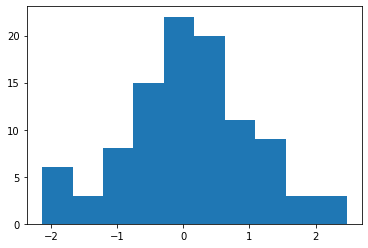

In [11]:
np.random.seed(10)
data = np.random.randn(100)
print('raw_data:\n',data)
np.min(data),np.max(data)
plt.hist(data)    # 정규성이 있다
plt.show()

insert outlier data:
 [ 1.33158650e+00  7.15278974e-01 -1.54540029e+00 -8.38384993e-03
  6.21335974e-01 -7.20085561e-01  2.65511586e-01  1.08548526e-01
  4.29143093e-03 -1.74600211e-01  4.33026190e-01  1.20303737e+00
 -9.65065671e-01  1.02827408e+00  2.28630130e-01  4.45137613e-01
 -1.13660221e+00  1.35136878e-01  1.48453700e+00 -1.07980489e+00
 -1.97772828e+00 -1.74337230e+00  2.66070164e-01  2.38496733e+00
  1.12369125e+00  1.67262221e+00  9.91492158e-02  1.39799638e+00
 -2.71247988e-01  6.13204185e-01 -2.67317189e-01 -5.49309014e-01
  1.32708296e-01 -4.76142015e-01  1.30847308e+00  1.95013279e-01
  4.00209988e-01 -3.37632337e-01  1.25647226e+00 -7.31969502e-01
  6.60231551e-01 -3.50871891e-01 -9.39433360e-01 -4.89337217e-01
 -8.04591142e-01 -2.12697639e-01 -3.39140246e-01  3.12169936e-01
  5.65152670e-01 -1.47420258e-01 -2.59053368e-02  2.89094204e-01
 -5.39879071e-01  7.08160020e-01  8.42224738e-01  2.03580797e-01
  2.39470366e+00  9.17458938e-01 -1.12272471e-01 -3.62180447e-01
 -2

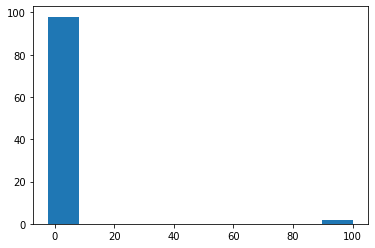

In [13]:
data[98:100] = 100
print('insert outlier data:\n',data)
plt.hist(data)
plt.show()

standardized data:
 [[-0.05414927]
 [-0.09811235]
 [-0.25937343]
 [-0.14973341]
 [-0.10481359]
 [-0.20050124]
 [-0.13019562]
 [-0.14139227]
 [-0.14882924]
 [-0.16159012]
 [-0.11824629]
 [-0.06331907]
 [-0.21797641]
 [-0.07578546]
 [-0.13282648]
 [-0.11738235]
 [-0.23021263]
 [-0.13949564]
 [-0.04323885]
 [-0.2261611 ]
 [-0.29021269]
 [-0.27349537]
 [-0.13015577]
 [ 0.02099156]
 [-0.06897907]
 [-0.02982217]
 [-0.14206275]
 [-0.04941206]
 [-0.1684843 ]
 [-0.10539365]
 [-0.1682039 ]
 [-0.18831923]
 [-0.13966888]
 [-0.18310001]
 [-0.05579802]
 [-0.13522447]
 [-0.12058717]
 [-0.17321969]
 [-0.0595074 ]
 [-0.20134896]
 [-0.10203905]
 [-0.17416411]
 [-0.21614798]
 [-0.18404126]
 [-0.20652928]
 [-0.16430773]
 [-0.17332726]
 [-0.12686734]
 [-0.10882131]
 [-0.15965129]
 [-0.15098327]
 [-0.1285134 ]
 [-0.18764656]
 [-0.09862017]
 [-0.08905693]
 [-0.13461333]
 [ 0.02168608]
 [-0.08369024]
 [-0.15714409]
 [-0.17497079]
 [-0.16569762]
 [-0.1849252 ]
 [-0.06861571]
 [-0.19891226]
 [-0.15492205]
 [-0.

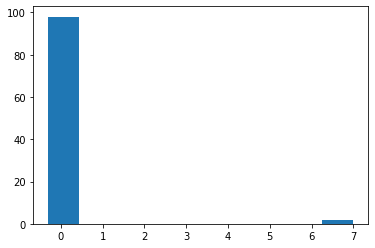

In [19]:
# sklearn 사용 표준화
data.shape   # (100,)       # 1 차원
data = data.reshape(-1,1)  # 반드시 2차원으로 변경하여 사용  , (100,1)
data_stand_skl = StandardScaler().fit_transform(data)
print('standardized data:\n',data_stand_skl)
plt.hist(data_stand_skl)   # 정규성이 없다
plt.show()

zoomin data:
 [-0.05414927 -0.09811235 -0.25937343 -0.14973341 -0.10481359 -0.20050124
 -0.13019562 -0.14139227 -0.14882924 -0.16159012 -0.11824629 -0.06331907
 -0.21797641 -0.07578546 -0.13282648 -0.11738235 -0.23021263 -0.13949564
 -0.04323885 -0.2261611  -0.29021269 -0.27349537 -0.13015577  0.02099156
 -0.06897907 -0.02982217 -0.14206275 -0.04941206 -0.1684843  -0.10539365
 -0.1682039  -0.18831923 -0.13966888 -0.18310001 -0.05579802 -0.13522447
 -0.12058717 -0.17321969 -0.0595074  -0.20134896 -0.10203905 -0.17416411
 -0.21614798 -0.18404126 -0.20652928 -0.16430773 -0.17332726 -0.12686734
 -0.10882131 -0.15965129 -0.15098327 -0.1285134  -0.18764656 -0.09862017
 -0.08905693 -0.13461333  0.02168608 -0.08369024 -0.15714409 -0.17497079
 -0.16569762 -0.1849252  -0.06861571 -0.19891226 -0.15492205 -0.18689165
 -0.07450798 -0.25032525 -0.17499352 -0.15783126 -0.1263547  -0.11625776
 -0.1645283  -0.07858183 -0.12668302  0.02688964 -0.25672849 -0.10486604
 -0.22368782 -0.20605974 -0.00753328 

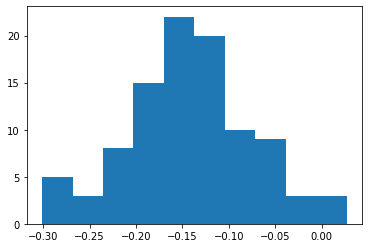

In [18]:
data_stand_skl_zoomin = data_stand_skl[data_stand_skl < 5]  
print('zoomin data:\n',data_stand_skl_zoomin)
plt.hist(data_stand_skl_zoomin)   # 정규성이 있다
plt.show()